# Lending Club Case Study

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

When a person applies for a loan, there are two types of decisions that could be taken by the company:

* Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

* Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

* Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

*  Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

1. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

2. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

3. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

 

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.


## Import libraries

Importing the necessary libraries for performing Exploratory Data Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Visualization 

With any data, the first step would be to visualize the data and understand the content. Try to get a gist of the fields present, data present, cleansing requirements and so on.

## Uploading the data

Upload the data into the pandas dataframe for performing all analysis

In [4]:
data_set = pd.read_csv("loan.csv",low_memory=False)
data_set.head(10)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   
5  1075269    1311441       5000         5000           5000.0   36 months   
6  1069639    1304742       7000         7000           7000.0   60 months   
7  1072053    1288686       3000         3000           3000.0   36 months   
8  1071795    1306957       5600         5600           5600.0   60 months   
9  1071570    1306721       5375         5375           5350.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   
5    7.90%       156.46     A        A4  ...                NaN   
6   15.96%       170.08     C        C5  ...                NaN   
7   18.64%       109.43     E        E1  ...                NaN   
8   21.28%       152.39     F        F2  ...                NaN   
9   12.69%       121.45     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   
5                NaN            NaN               NaN                  0.0   
6                NaN            NaN               NaN                  0.0   
7                NaN            NaN               NaN                  0.0   
8                NaN            NaN               NaN                  0.0   
9                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   
5       0.0             NaN               NaN            NaN   
6       0.0             NaN               NaN            NaN   
7       0.0             NaN               NaN            NaN   
8       0.0             NaN               NaN            NaN   
9       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  
5                        NaN  
6                        NaN  
7                        NaN  
8                        NaN  
9                        NaN  

[10 rows x 111 columns]

In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Describe the data 

Use the commands like describe, shape command to understand the field analytics

In [6]:
data_set.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

In [7]:
data_set.shape

(39717, 111)

In the dataset 39717 rows and 111 columns present.
There are three types of variable 
1. Variable related to Applicants ( Demographics i.e age,employee details,occupation)
2. Loan characterstics ( Type of loan, Amount requested,Interest loan,purpose of loan)
3. Customer behavior varaibles (those which are generated after loan is sanctioned delinquent 2 years,revolving balance, next payment etc).

Now the customer behavior variables will not be available during loan application request, so they can not be used to predict the credit approval.


Customer Behavior variables will not be available for fresh application
data_set_clean.drop(['delinq_amnt','application_type','policy_code','initial_list_status','acc_now_delinq','pymnt_plan','member_id','url','id','funded_amnt_inv','delinq_2yrs','revol_bal','zip_code'], axis = 1, inplace = True)
delinq_amnt

* delinq_amnt: &ensp;      The past-due amount owed for the accounts on which the borrower is now delinquent\.
* earliest_cr_line : &ensp;	The month the borrower's earliest reported credit line was openen\
* inq_last_6mths: &ensp;	    The number of inquiries in past 6 months (excluding auto and mortgage inquiries)\
* open_acc: &ensp;	        The number of open credit lines in the borrower's credit file.\
* pub_rec: &ensp;	            Number of derogatory public records\
* revol_bal	: &ensp;        Total credit revolving balance\
* revol_util: &ensp;	        Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.\
* total_acc	 : &ensp;       The total number of credit lines currently in the borrower's credit file\
* out_prncp	  : &ensp;      Remaining outstanding principal for total amount funded\
* out_prncp_inv	 : &ensp;   Remaining outstanding principal for portion of total amount funded by investors\
* total_pymnt	 : &ensp;       Payments received to date for total amount funded\
* total_pymnt_inv	: &ensp;    Payments received to date for portion of total amount funded by investors\
* total_rec_prncp	: &ensp;    Principal received to date\
* total_rec_int	 : &ensp;   Interest received to date\
* total_rec_late_fee: &ensp;	Late fees received to date\
* recoveries : &ensp;	        post charge off gross recovery\
* collection_recovery_fee : &ensp;	post charge off collection fee\
* last_pymnt_d	: &ensp;    Last month payment was received\
* last_pymnt_amnt	: &ensp;Last total payment amount received\
* last_credit_pull_d	: &ensp;The most recent month LC pulled credit for this loan\
* application_type	: &ensp;Indicates whether the loan is an individual application or a joint application with two co-borrowers\
* mths_since_last_delinq : &ensp;The number of months since the borrower's last delinquency.\


## Data Cleaning

First remove customer behavior columns as those coulmns are not avialble during fresh loan applicants.

In [8]:
data_set=data_set.drop(['delinq_amnt','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type','mths_since_last_delinq'],axis=1)

In [9]:
data_set.shape

(39717, 89)

* Find null and empty values 

In [10]:
missing_values = round((data_set.isnull().sum()/len(data_set.id))*100, 2) 
print(missing_values)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 89, dtype: float64


As we can see there are many empty values, so we decided to drop those columns 80% empty value . It will not add any impact in our decission

In [11]:

columns_with_missing_values = list(missing_values[missing_values >=80].index)
print(columns_with_missing_values)

['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort'

In [12]:
len(columns_with_missing_values)

56

In [13]:
data_set = data_set.drop(columns_with_missing_values,axis=1)
data_set.shape

(39717, 33)

In [14]:
data_set.nunique().sort_values()


tax_liens                         1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
zip_code                        823
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
funded_amnt_inv                8205
installment                   15383
title                       

As belwo coumn  0 or nan , so it will not impact our analysis , so we can drop.

tax_liens                         1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1

desc column Loan description provided by the borrower which is duplicate as title and purpose of the loan column is avialble.
desc                          26527

emp_title The job title supplied by the Borrower when applying for the loan.so it will impact our analysis
emp_title                     28820

URL for the LC page with listing data. so this field also impact our analysis
url                           39717

A unique LC assigned Id for the borrower member. this is also unique for each borrower so not required our analysis
member_id                     39717
id   : A unique LC assigned ID for the loan listing. so it is not required          

Lets drop above columns and will check again


In [15]:
data_set = data_set.drop(['tax_liens','chargeoff_within_12_mths','acc_now_delinq','policy_code','collections_12_mths_ex_med','initial_list_status','pymnt_plan','desc','emp_title','url','member_id','id'],axis=1)

In [16]:
data_set.shape

(39717, 21)

In [17]:
data_set.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     11
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
pub_rec_bankruptcies     697
dtype: int64

As we reduced 111 column to 21 column, lets store it new file and start analysing the further

In [18]:
data_set.to_csv('clean_loan_updated.csv')

## Further Analysis of the columns 

In [19]:
data_set = pd.read_csv("clean_loan_updated.csv")

In [20]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  title              

funded_amnt,funded_amnt_inv will be same with loan_amount , once the application approved. so no need to keep three columns
zip_code column has The first 3 numbers of the zip code provided by the borrower in the loan application, we can not conclude anything as the other characts missing and we will identify the exact geo location
and addr_state column also does not make any sense as zip_code's 3 character avaible.

so we will drop these columns.



In [21]:
data_set = data_set.drop(['funded_amnt','funded_amnt_inv','addr_state','zip_code'],axis=1)

In [22]:
data_set.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     11
dti                        0
delinq_2yrs                0
pub_rec_bankruptcies     697
dtype: int64

In [23]:
data_set.shape

(39717, 17)

as only few records has empty value of title, pub_rec_bankruptcies,emp_length , we decided to drop those rows.

In [24]:
data_set=data_set[~data_set.title.isnull()]
data_set=data_set[~data_set.pub_rec_bankruptcies.isnull()]
data_set=data_set[~data_set.emp_length.isnull()]
data_set.shape

(37935, 17)

In [25]:
data_set.corr()

loan_amnt  installment  annual_inc       dti  \
loan_amnt              1.000000     0.929365    0.272432  0.064622   
installment            0.929365     1.000000    0.272182  0.052883   
annual_inc             0.272432     0.272182    1.000000 -0.124641   
dti                    0.064622     0.052883   -0.124641  1.000000   
delinq_2yrs           -0.034444    -0.022729    0.022374 -0.035885   
pub_rec_bankruptcies  -0.033214    -0.030307   -0.012905  0.006005   

                      delinq_2yrs  pub_rec_bankruptcies  
loan_amnt               -0.034444             -0.033214  
installment             -0.022729             -0.030307  
annual_inc               0.022374             -0.012905  
dti                     -0.035885              0.006005  
delinq_2yrs              1.000000              0.005840  
pub_rec_bankruptcies     0.005840              1.000000

Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
So we should removed the rows from dataset as we can not labelled it as whether defaulted or not defaulted

In [26]:
data_set = data_set[data_set.loan_status != "Current"]
data_set.shape

(36837, 17)


Now we have cleaned data and we have 17 columns available for our analysis. Here our target variable loan_status which we need to analyse with other variables
loan_status will be default or not default based on other variables.

Lets check below variables for our analysis.
term,grade,sub_grade,purpose of loan, Annual Income,Emp_length,dti,verification_status


In [27]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36837 entries, 0 to 39680
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36837 non-null  int64  
 1   term                  36837 non-null  object 
 2   int_rate              36837 non-null  object 
 3   installment           36837 non-null  float64
 4   grade                 36837 non-null  object 
 5   sub_grade             36837 non-null  object 
 6   emp_length            36837 non-null  object 
 7   home_ownership        36837 non-null  object 
 8   annual_inc            36837 non-null  float64
 9   verification_status   36837 non-null  object 
 10  issue_d               36837 non-null  object 
 11  loan_status           36837 non-null  object 
 12  purpose               36837 non-null  object 
 13  title                 36837 non-null  object 
 14  dti                   36837 non-null  float64
 15  delinq_2yrs        

## Categorize the data based on the consumption

Analyse the columns in the data set and categorise then based on the impact they have in our decision making process

In [28]:
data_set.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'delinq_2yrs',
       'pub_rec_bankruptcies'],
      dtype='object')

In [29]:
data_set.shape

(36837, 17)

In [30]:
data_set.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
delinq_2yrs             0
pub_rec_bankruptcies    0
dtype: int64

### Convert the Employee Length field to have only numbers

The data present in the employee lenght (no of years of experience) are character based. In order to perform some analysis on it, we would have to convert to numeric.

In [31]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10,
    'Not Known' : 0
}
data_set = data_set.replace({"emp_length": emp_length_dict })

In [32]:
loan_status_dict = {
    'Fully Paid' : 1,
    'Charged Off' : 0,
  
}
data_set = data_set.replace({"loan_status": loan_status_dict })

In [33]:
data_set.pub_rec_bankruptcies.isnull().sum()

0

### Clean up the interest field and Revol_util field 

The interest field and revol_util field both have % symbol in them. Hence, data cleansing is requried to remove this and make the data a whole number. 

In [34]:
data_set['int_rate'] = data_set['int_rate'].str.rstrip('%')

In [35]:
data_set['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: object

### Clean up the term field

The term field has "months" added to the data. We will clean this up and make it just a number. 

In [36]:
data_set['term'] = data_set['term'].str.rstrip('months')

### Convert the columns to numeric data type

We did clean up of many columns and also there are already existing columns where non numeric data types are used. We will not convert that to numeric data type for the analysis to be performed. 

In [37]:
data_set.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'delinq_2yrs',
       'pub_rec_bankruptcies'],
      dtype='object')

In [38]:
columns = ['loan_amnt',
       'term', 'int_rate', 'installment', 'emp_length','annual_inc', 'dti']

data_set[columns] = data_set[columns].apply(pd.to_numeric)
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36837 entries, 0 to 39680
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36837 non-null  int64  
 1   term                  36837 non-null  int64  
 2   int_rate              36837 non-null  float64
 3   installment           36837 non-null  float64
 4   grade                 36837 non-null  object 
 5   sub_grade             36837 non-null  object 
 6   emp_length            36837 non-null  int64  
 7   home_ownership        36837 non-null  object 
 8   annual_inc            36837 non-null  float64
 9   verification_status   36837 non-null  object 
 10  issue_d               36837 non-null  object 
 11  loan_status           36837 non-null  int64  
 12  purpose               36837 non-null  object 
 13  title                 36837 non-null  object 
 14  dti                   36837 non-null  float64
 15  delinq_2yrs        

In [39]:
data_set.corr()

loan_amnt      term  int_rate  installment  emp_length  \
loan_amnt              1.000000  0.347277  0.298359     0.931262    0.149231   
term                   0.347277  1.000000  0.440018     0.088836    0.102771   
int_rate               0.298359  0.440018  1.000000     0.274559   -0.002036   
installment            0.931262  0.088836  0.274559     1.000000    0.122716   
emp_length             0.149231  0.102771 -0.002036     0.122716    1.000000   
annual_inc             0.270280  0.044245  0.047188     0.269243    0.112231   
loan_status           -0.060628 -0.178369 -0.214777    -0.026569   -0.015659   
dti                    0.060605  0.075470  0.106964     0.050575    0.048780   
delinq_2yrs           -0.034814  0.008071  0.158681    -0.023069    0.014862   
pub_rec_bankruptcies  -0.031774  0.017494  0.083031    -0.029375    0.062678   

                      annual_inc  loan_status       dti  delinq_2yrs  \
loan_amnt               0.270280    -0.060628  0.060605    -0.034814   
term                    0.044245    -0.178369  0.075470     0.008071   
int_rate                0.047188    -0.214777  0.106964     0.158681   
installment             0.269243    -0.026569  0.050575    -0.023069   
emp_length              0.112231    -0.015659  0.048780     0.014862   
annual_inc              1.000000     0.039852 -0.123441     0.021345   
loan_status             0.039852     1.000000 -0.042587    -0.017362   
dti                    -0.123441    -0.042587  1.000000    -0.034764   
delinq_2yrs             0.021345    -0.017362 -0.034764     1.000000   
pub_rec_bankruptcies   -0.012393    -0.045623  0.006714     0.005746   

                      pub_rec_bankruptcies  
loan_amnt                        -0.031774  
term                              0.017494  
int_rate                          0.083031  
installment                      -0.029375  
emp_length                        0.062678  
annual_inc                       -0.012393  
loan_status                      -0.045623  
dti                               0.006714  
delinq_2yrs                       0.005746  
pub_rec_bankruptcies              1.000000

## Key Fields which will impact the analysis
Key fields are term,grade,subgrade,emp_length,home_ownership,dti,installment.
Our target variable loan_status. Lets first check percentage of the defaulters and non defaulters.

## Univariate Analysis of each column

First term of the loan


### Distribution of loans across Loan Status

Let us now see how the loans are distributed across the status field. This will give us an idea of how many laons are full paid against charged off. 

In [44]:
data_set.loan_status.value_counts()

1    31557
0     5280
Name: loan_status, dtype: int64

In [45]:
import plotly.express as px
fig = px.pie(data_set, values='term', names='term')
fig.show()

64% of loans are higher term basically 60 months
<img src="./image_new/term.png">

In [79]:
fig = px.pie(data_set, values='emp_length', names='emp_length')
fig.show()

46% of loan from 10+ year of experience

<img src="./image_new/emp_length.png">

In [47]:
data_set.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [48]:
verification_dict = {
    'Verified' : 2,
    'Source Verified' : 1,
    'Not Verified' : 0,
   
}
data_set = data_set.replace({"verification_status": verification_dict })
fig = px.pie(data_set, values='verification_status', names='verification_status')
fig.show()

71% loans are source verified

<img src="./image_new/verification.png">

In [49]:
data_set.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [80]:
home_ownership_dict = {
    'RENT' : 1,
    'OWN' : 2,
    'MORTGAGE' : 3,
    'OTHER' : 4,
    'NONE' : 0
   
}
data_set = data_set.replace({"home_ownership": home_ownership_dict })
fig = px.pie(data_set, values='home_ownership', names='home_ownership')
fig.show()

68% applicants have mortage home ownership

<img src="./image_new/home_ownership.png">

In [342]:
data_set.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [81]:
fig = px.histogram(data_set, x="purpose")
fig.show()

<img src="./image_new/purpose.png">

In [82]:
purpose_dict = {
    'credit_card' : 1,
    'car' : 2,
    'other' : 3,
    'wedding' : 4,
    'debt_consolidation' : 5,
    'home_improvement' : 6,
    'major_purchase' : 7,
    'medical' : 8,
    'moving' : 9,
    'vacation' : 10,
    'house' : 11,
    'renewable_energy' : 12,
    'educational' : 13

   
}
data_set = data_set.replace({"purpose": purpose_dict })
fig = px.pie(data_set, values='purpose', names='purpose')
fig.show()

Mainly applicants are taking loan for the debt_consolidation

<img src="./image_new/purpose1.png">

In [53]:
data_set.annual_inc.unique()

array([ 24000.  ,  30000.  ,  12252.  , ...,  11029.  , 100671.39,
        36153.  ])

In [56]:
fig = px.histogram(data_set, x="annual_inc")
fig.show()


Annual income varies from 52K - 74K

<img src="./image_new/annual_inc.png">

In [83]:
#'issue_d'#
fig = px.histogram(data_set, x="issue_d")
fig.show()

maximum loan processed between June 2010 and Dec 2011

<img src="./image_new/issue_d.png">

In [84]:
#'int_rate
fig = px.histogram(data_set, x="int_rate",nbins=6)
fig.show()

maxium applicants interest rate varies between 10 to 14.99

<img src="./image_new/int_rate.png">

In [85]:
# grade
df1 = data_set.groupby(["grade"]).count().reset_index()

fig = px.bar(df1,
             y=data_set.groupby(["grade"]).size(),
             x="grade",
             color='grade')
fig.show()

### Loan Amount Distribution

Let us plot a graph to see how the loan amounts are distributed

/Users/i311077/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='loan_amnt'>

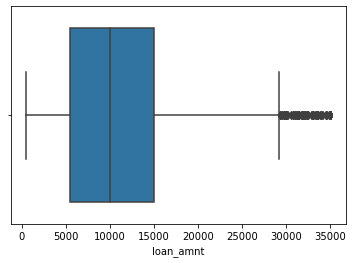

In [60]:
sns.boxplot(data_set.loan_amnt)

## Derived Variates


Let us now look at how we can add additional columns to the data set, to make it richer and help our analysis process.

### Deriving Month and Year from Issued Date

Let us try to split the column issued_d to get two new columns: issued_month and issued_year

In [61]:
data_set['issued_month'], data_set['issued_year'] = data_set['issue_d'].str.split('-').str
data_set['issued_year'] = '20' + data_set['issued_year']
data_set['issued_year'] = pd.to_numeric(data_set['issued_year'], downcast = 'integer')
#data_set['issued_year'] = data_set['issued_year'].apply(pd.to_numeric(data_set.issued_year, downcast = 'integer'))
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36837 entries, 0 to 39680
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36837 non-null  int64  
 1   term                  36837 non-null  int64  
 2   int_rate              36837 non-null  float64
 3   installment           36837 non-null  float64
 4   grade                 36837 non-null  object 
 5   sub_grade             36837 non-null  object 
 6   emp_length            36837 non-null  int64  
 7   home_ownership        36837 non-null  int64  
 8   annual_inc            36837 non-null  float64
 9   verification_status   36837 non-null  int64  
 10  issue_d               36837 non-null  object 
 11  loan_status           36837 non-null  int64  
 12  purpose               36837 non-null  object 
 13  title                 36837 non-null  object 
 14  dti                   36837 non-null  float64
 15  delinq_2yrs        

/var/folders/ph/3xd4vzv97z17ntf2zpc3zx3h0000gn/T/ipykernel_54797/1604959216.py:1: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



In [62]:
data_set[['issued_month','issued_year']].head()


issued_month  issued_year
0          Dec         2011
1          Dec         2011
2          Dec         2011
3          Dec         2011
5          Dec         2011

### Loan Ratio 

Let us now create a new column called Loan Ration using the formula loan_ration = funded_amnt/annual_inc


In [63]:
data_set['loan_ratio'] = (data_set.loan_amnt/data_set.annual_inc)*100
data_set['loan_ratio'].head()


#data_set.to_csv("loans_cleansed.csv")

0    20.833333
1     8.333333
2    19.588639
3    20.325203
5    13.888889
Name: loan_ratio, dtype: float64

## Bivariate Analysis

Lets start from how grade is inflencing the defaulter

In [64]:


df_g = data_set.groupby(['grade', 'loan_status']).size().reset_index()
df_g['percentage'] = data_set.groupby(['grade', 'loan_status']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['grade', 'loan_status', 'Counts', 'Percentage']

px.bar(df_g, x='grade', y=['Counts'], color='loan_status', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

22% and 27%grade D and E category is mostly defaulter. so lendee can increase rate of interest .
<img src="./image_new/grade_bi.png">

In [86]:


df_g = data_set.groupby(['home_ownership', 'loan_status']).size().reset_index()
df_g['percentage'] = data_set.groupby(['home_ownership', 'loan_status']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['home_ownership', 'loan_status', 'Counts', 'Percentage']

px.bar(df_g, x='home_ownership', y=['Counts'], color='loan_status', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

 'RENT' : 1,
    'OWN' : 2,
    'MORTGAGE' : 3,
    'OTHER' : 4,
    'NONE' : 0

    As those who are not proving home ownship are highly chance of defaulter. so lender should not provide loan to them or provide higher rate interest.
<img src="./image_new/home_ownership_bi.png">


In [87]:


df_g = data_set.groupby(['purpose', 'loan_status']).size().reset_index()
df_g['percentage'] = data_set.groupby(['purpose', 'loan_status']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['purpose', 'loan_status', 'Counts', 'Percentage']

px.bar(df_g, x='purpose', y=['Counts'], color='loan_status', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

'credit_card' : 1,
    'car' : 2,
    'other' : 3,
    'wedding' : 4,
    'debt_consolidation' : 5,
    'home_improvement' : 6,
    'major_purchase' : 7,
    'medical' : 8,
    'moving' : 9,
    'vacation' : 10,
    'house' : 11,
    'renewable_energy' : 12,
    'educational' : 13
    <img src="./image_new/purpose_bi.png">

debt consolidation purpose is highest reason for loan

In [88]:


df_g = data_set.groupby(['emp_length', 'loan_status']).size().reset_index()
df_g['percentage'] = data_set.groupby(['emp_length', 'loan_status']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['emp_length', 'loan_status', 'Counts', 'Percentage']

px.bar(df_g, x='emp_length', y=['Counts'], color='loan_status', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))


<img src="./image_new/emp_length_bi.png">

In [89]:
# 'verification_status'
df_g = data_set.groupby(['verification_status', 'loan_status']).size().reset_index()
df_g['percentage'] = data_set.groupby(['verification_status', 'loan_status']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['verification_status', 'loan_status', 'Counts', 'Percentage']

px.bar(df_g, x='verification_status', y=['Counts'], color='loan_status', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))


'Verified' : 2,
    'Source Verified' : 1,
    'Not Verified' : 0
     <img src="./image/verification_bi.png">

### Annual Income Distribution

Let us now plot a graph to see how the distribution of annual incomes are present in the data set.

/Users/i311077/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='annual_inc'>

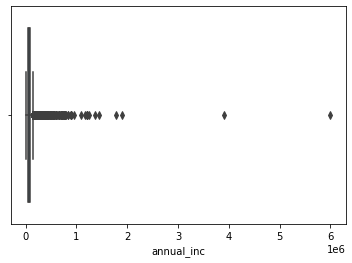

In [69]:
sns.boxplot(data_set.annual_inc)

From the above, it is clear that there are outliners present in the data and hence the graph plotted is not consumable. 

Let us now try to calculate the percentile and make better use of this graph. The idea is to remove the outliers from the data set while we plot the graph

In [70]:
annual_inc_90_percentile = data_set['annual_inc'].quantile(0.90)
annual_inc_90_percentile

116700.0

/Users/i311077/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='annual_inc'>

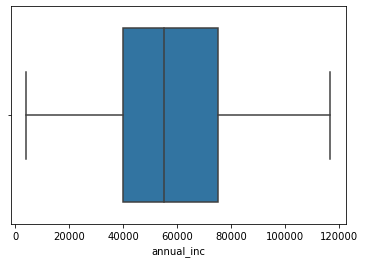

In [71]:
data_set_2 = data_set[data_set.annual_inc <= annual_inc_90_percentile]
sns.boxplot(data_set_2.annual_inc)

From this we can come to the below conclusion:
1. Mean of the annual income is close to ~5.5 lakhs
2. Most of the loans are provided to annual income level between 4 lakhs and less than 8 lakhs (~7.5 lakhs)

### Dept to Income Ratio Plotting

Let us see how the dti value plotting looks like

/Users/i311077/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='dti'>

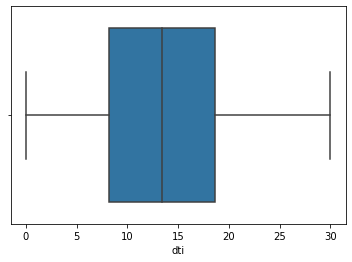

In [245]:
sns.boxplot(data_set.dti)

From the above we can conclude that, most of the loans are provided to customers with dti value between 7.5 and 18. 

### Distribution of Loan Ratio

Let us see how the Loan Ratio data is distributed across loans based on the status

/Users/i311077/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='loan_ratio'>

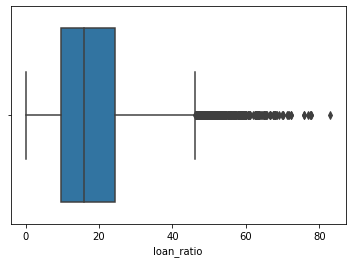

In [249]:
sns.boxplot(data_set.loan_ratio[data_set['loan_status'] == 'Fully Paid'])

/Users/i311077/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='loan_ratio'>

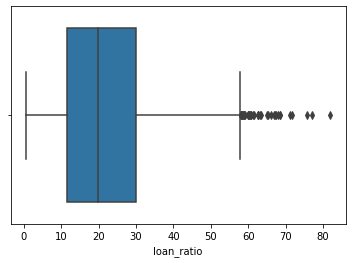

In [250]:
sns.boxplot(data_set.loan_ratio[data_set['loan_status'] == 'Charged Off'])

Similar to the home ownership data, even with loan ratio we are not able to infer something useful as the trend aganst home ration and loan status, stays same for both Charged off loans and Full Paid Loans

### Distribution of Loan across Years

Let us now look at how the loans are distributed across years

/Users/I018289/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='issued_year'>

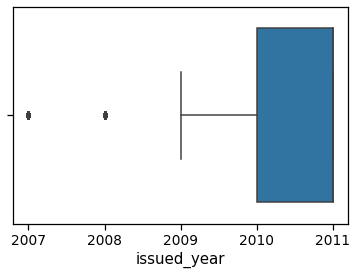

In [224]:
sns.boxplot(data_set.issued_year)

Cleary there are some outliers which we need to exclude. 

/Users/I018289/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='issued_year'>

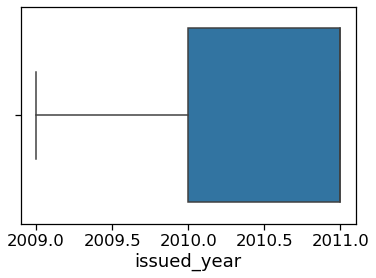

In [228]:
issued_year_10_percentile = data_set['issued_year'].quantile(0.10)
data_set_3 = data_set[data_set.issued_year >= issued_year_10_percentile]
sns.set_context("notebook", font_scale=1.5)
sns.boxplot(data_set_3.issued_year)

From the above graph we can conclude that most of the loans were issued during the year 2010 to 2011. 

In [369]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38566 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38566 non-null  int64  
 1   term                  38566 non-null  int64  
 2   int_rate              38566 non-null  float64
 3   installment           38566 non-null  float64
 4   grade                 38566 non-null  object 
 5   sub_grade             38566 non-null  object 
 6   emp_length            38566 non-null  int64  
 7   home_ownership        38566 non-null  int64  
 8   annual_inc            38566 non-null  float64
 9   verification_status   38566 non-null  int64  
 10  issue_d               38566 non-null  object 
 11  loan_status           38566 non-null  int64  
 12  purpose               38566 non-null  object 
 13  title                 38566 non-null  object 
 14  dti                   38566 non-null  float64
 15  delinq_2yrs        

In [74]:
data_set.corr()

loan_amnt      term  int_rate  installment  emp_length  \
loan_amnt              1.000000  0.347277  0.298359     0.931262    0.149231   
term                   0.347277  1.000000  0.440018     0.088836    0.102771   
int_rate               0.298359  0.440018  1.000000     0.274559   -0.002036   
installment            0.931262  0.088836  0.274559     1.000000    0.122716   
emp_length             0.149231  0.102771 -0.002036     0.122716    1.000000   
home_ownership         0.167403  0.096322 -0.070024     0.132222    0.258510   
annual_inc             0.270280  0.044245  0.047188     0.269243    0.112231   
verification_status    0.416997  0.241243  0.200156     0.366361    0.085341   
loan_status           -0.060628 -0.178369 -0.214777    -0.026569   -0.015659   
dti                    0.060605  0.075470  0.106964     0.050575    0.048780   
delinq_2yrs           -0.034814  0.008071  0.158681    -0.023069    0.014862   
pub_rec_bankruptcies  -0.031774  0.017494  0.083031    -0.029375    0.062678   
issued_year            0.116372  0.232211  0.025644     0.061496    0.111057   
loan_ratio             0.608691  0.282112  0.211949     0.547931   -0.000678   

                      home_ownership  annual_inc  verification_status  \
loan_amnt                   0.167403    0.270280             0.416997   
term                        0.096322    0.044245             0.241243   
int_rate                   -0.070024    0.047188             0.200156   
installment                 0.132222    0.269243             0.366361   
emp_length                  0.258510    0.112231             0.085341   
home_ownership              1.000000    0.192543             0.073255   
annual_inc                  0.192543    1.000000             0.129850   
verification_status         0.073255    0.129850             1.000000   
loan_status                 0.022051    0.039852            -0.051439   
dti                        -0.028222   -0.123441             0.063899   
delinq_2yrs                 0.020682    0.021345             0.008430   
pub_rec_bankruptcies        0.033635   -0.012393            -0.011815   
issued_year                 0.035030    0.014694             0.175423   
loan_ratio                 -0.084735   -0.232411             0.237126   

                      loan_status       dti  delinq_2yrs  \
loan_amnt               -0.060628  0.060605    -0.034814   
term                    -0.178369  0.075470     0.008071   
int_rate                -0.214777  0.106964     0.158681   
installment             -0.026569  0.050575    -0.023069   
emp_length              -0.015659  0.048780     0.014862   
home_ownership           0.022051 -0.028222     0.020682   
annual_inc               0.039852 -0.123441     0.021345   
verification_status     -0.051439  0.063899     0.008430   
loan_status              1.000000 -0.042587    -0.017362   
dti                     -0.042587  1.000000    -0.034764   
delinq_2yrs             -0.017362 -0.034764     1.000000   
pub_rec_bankruptcies    -0.045623  0.006714     0.005746   
issued_year             -0.029992  0.081288     0.003768   
loan_ratio              -0.118359  0.150012    -0.065642   

                      pub_rec_bankruptcies  issued_year  loan_ratio  
loan_amnt                        -0.031774     0.116372    0.608691  
term                              0.017494     0.232211    0.282112  
int_rate                          0.083031     0.025644    0.211949  
installment                      -0.029375     0.061496    0.547931  
emp_length                        0.062678     0.111057   -0.000678  
home_ownership                    0.033635     0.035030   -0.084735  
annual_inc                       -0.012393     0.014694   -0.232411  
verification_status              -0.011815     0.175423    0.237126  
loan_status                      -0.045623    -0.029992   -0.118359  
dti                               0.006714     0.081288    0.150012  
delinq_2yrs                       0.005746     0.00376

interest rate below 14, there will be highly chance of fully paid

<AxesSubplot:title={'center':'int_rate'}, xlabel='loan_status'>

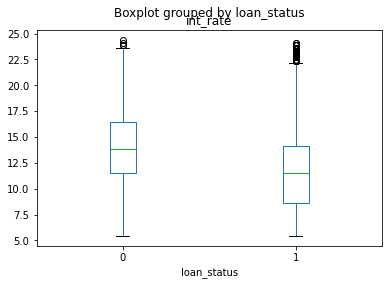

In [75]:
data_set.boxplot(by ='loan_status', column =['int_rate'], grid = False)


<Figure size 1440x360 with 0 Axes>

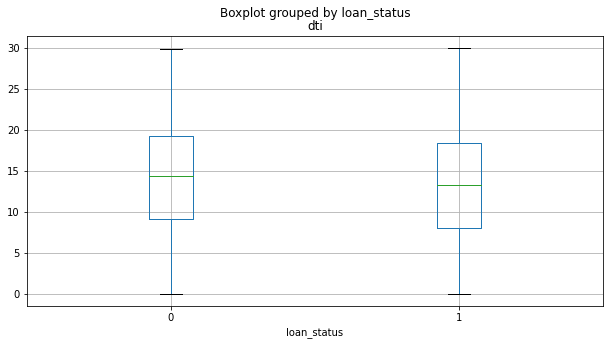

In [76]:
plt.figure(figsize=(20,5))
data_set.boxplot(column='dti', by='loan_status',figsize=(10,5))
plt.show()

<Figure size 1440x360 with 0 Axes>

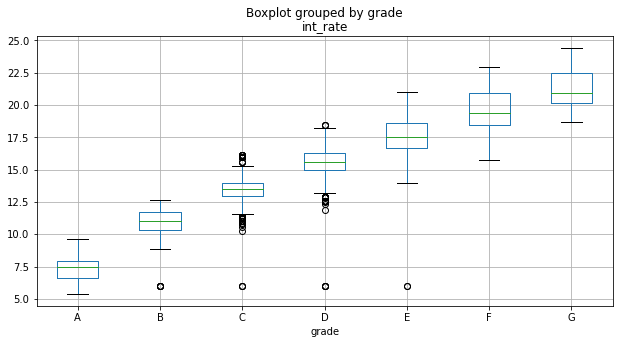

In [77]:
plt.figure(figsize=(20,5))
data_set.boxplot(column='int_rate', by='grade',figsize=(10,5))
plt.show()

As we can see for grade level D onwards, there will be higher charge of rate of interest

<AxesSubplot:>

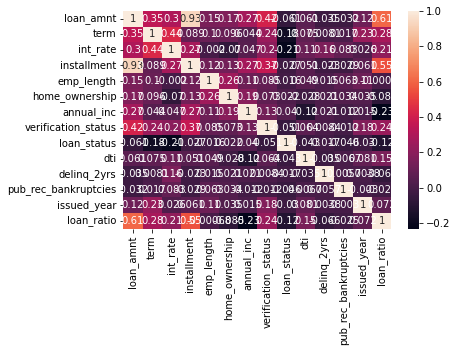

In [78]:
sns.heatmap(data_set.corr(),annot=True)

loan amount is highly corelated with rate of interest of 0.93